In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')

In [81]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [83]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [84]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [86]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
def func_accuracy(algorithm, x_train, y_train, vc):
    model = algorithm.fit(x_train, y_train)
    accuracy = round(model.score(x_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algorithm, x_train, y_train, cv = vc, n_jobs = 1)
    accuracy_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return accuracy, accuracy_vc

In [88]:
num_data = train.select_dtypes(exclude=['object']).copy()

In [89]:
cat_data = train.select_dtypes(include=['object']).copy()

In [90]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [91]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [92]:
num_data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [93]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [94]:
num_data['LotFrontage'] = num_data['LotFrontage'].fillna(abs(num_data['LotFrontage'].median()))
num_data['MasVnrArea'] = num_data['MasVnrArea'].fillna(abs(num_data['MasVnrArea'].mean()))

In [95]:
num_data['GarageYrBlt'] = num_data['GarageYrBlt'].fillna(num_data['GarageYrBlt'].mode()[0])

C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\augus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: num must be 1 <= num <= 36, not 37

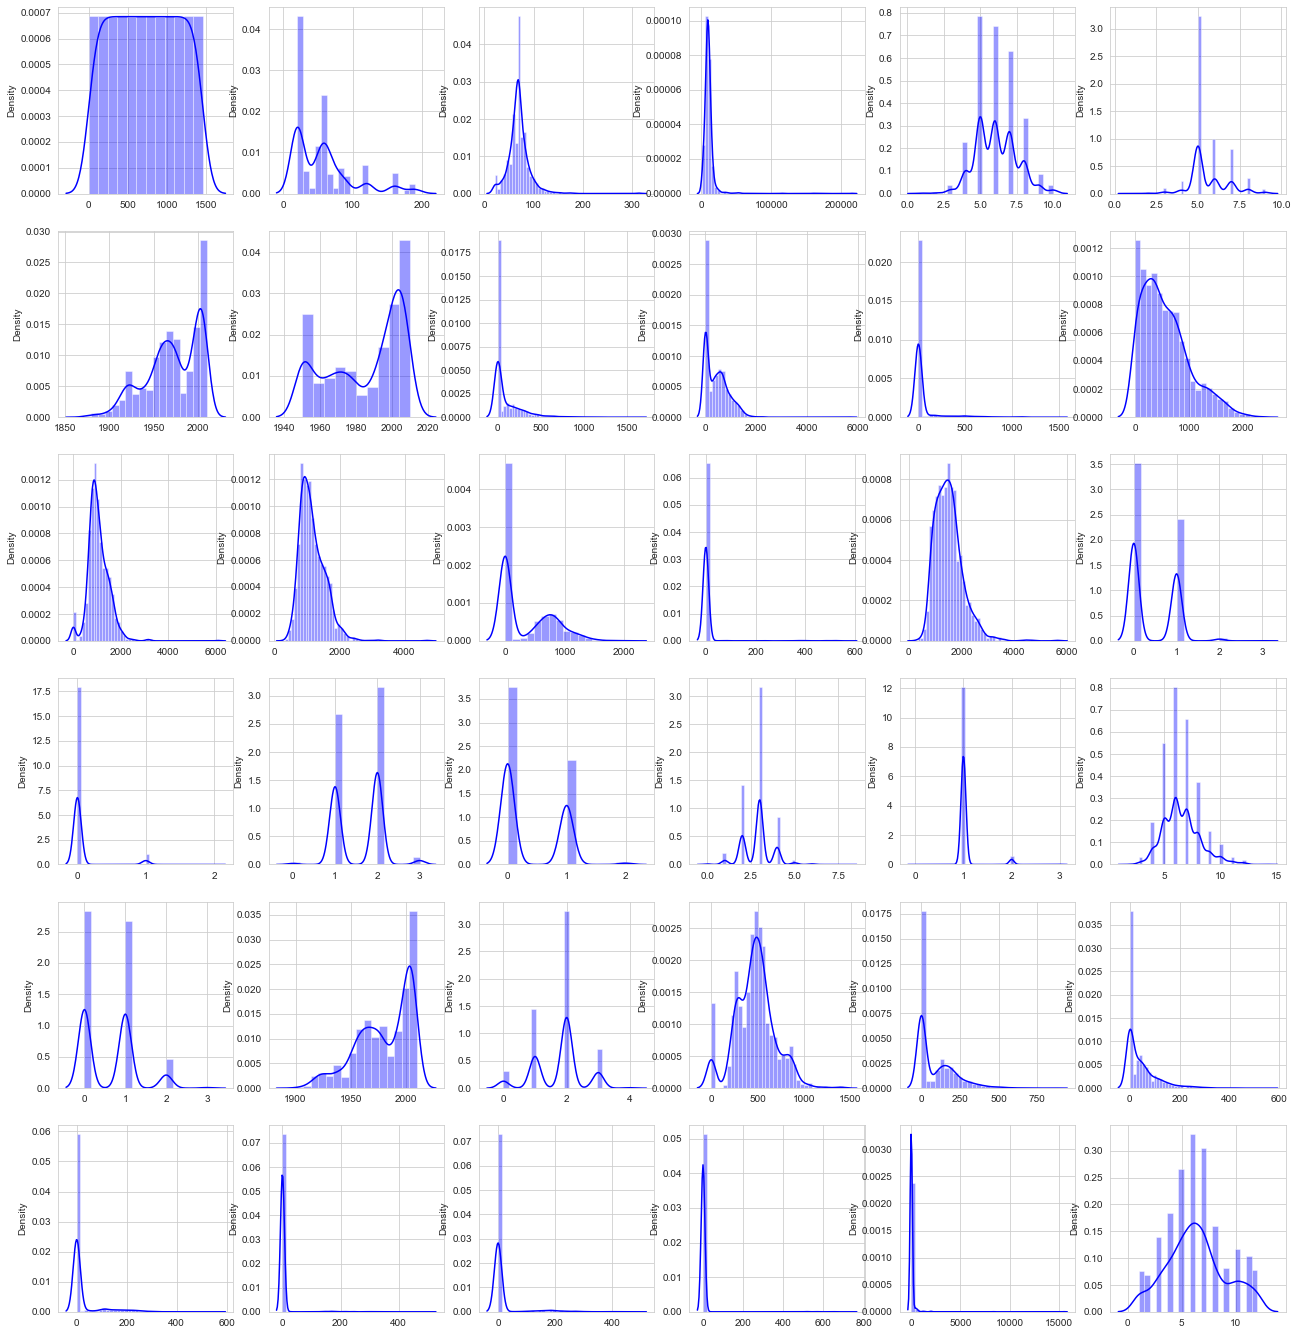

In [96]:
fig = plt.figure(figsize=(22,24))
for ind,col in enumerate(num_data):
    plt.subplot(6,6,ind+1)
    sns.distplot(x=num_data.loc[:,col].dropna(),kde='False',color='b')

fig.tight_layout(pad=1.5)

In [97]:
num_data['LotArea'] = np.log(num_data.loc[:,'LotArea'])

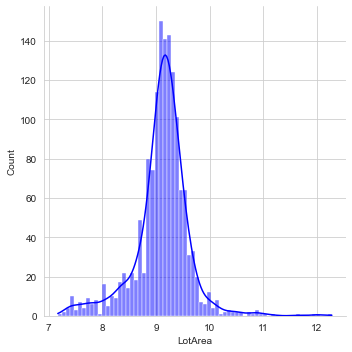

In [98]:
sns.displot(x=num_data.loc[:,'LotArea'].dropna(),kde='False',color='b')

<AxesSubplot:xlabel='YrSold'>

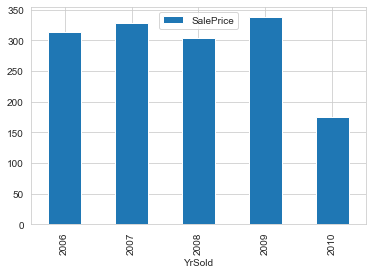

In [99]:
num_data.groupby('YrSold')['SalePrice'].count().plot(kind='bar', legend=True)

In [100]:
num_data.drop(['GrLivArea','OverallQual','LowQualFinSF','GarageCars','PoolArea','3SsnPorch','MiscVal'],axis=1,inplace=True)

In [101]:
num_data.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,1,60,65.0,9.041922,5,2003,2003,196.0,706,0,...,0,2003.0,548,0,61,0,0,2,2008,208500
1,2,20,80.0,9.169518,8,1976,1976,0.0,978,0,...,1,1976.0,460,298,0,0,0,5,2007,181500
2,3,60,68.0,9.328123,5,2001,2002,162.0,486,0,...,1,2001.0,608,0,42,0,0,9,2008,223500
3,4,70,60.0,9.164296,5,1915,1970,0.0,216,0,...,1,1998.0,642,0,35,272,0,2,2006,140000
4,5,60,84.0,9.565214,5,2000,2000,350.0,655,0,...,1,2000.0,836,192,84,0,0,12,2008,250000


In [102]:
num_data = num_data.drop(num_data[num_data['LotFrontage'] > 200].index)
num_data = num_data.drop(num_data[num_data['LotArea'] > 100000].index)
num_data = num_data.drop(num_data[num_data['Fireplaces'] > 2.5].index)
num_data = num_data.drop(num_data[num_data['TotalBsmtSF'] > 5000].index)
num_data = num_data.drop(num_data[num_data['BsmtFinSF1'] > 4000].index)
num_data = num_data.drop(num_data[num_data['WoodDeckSF'] > 750].index)

In [103]:
num_data.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

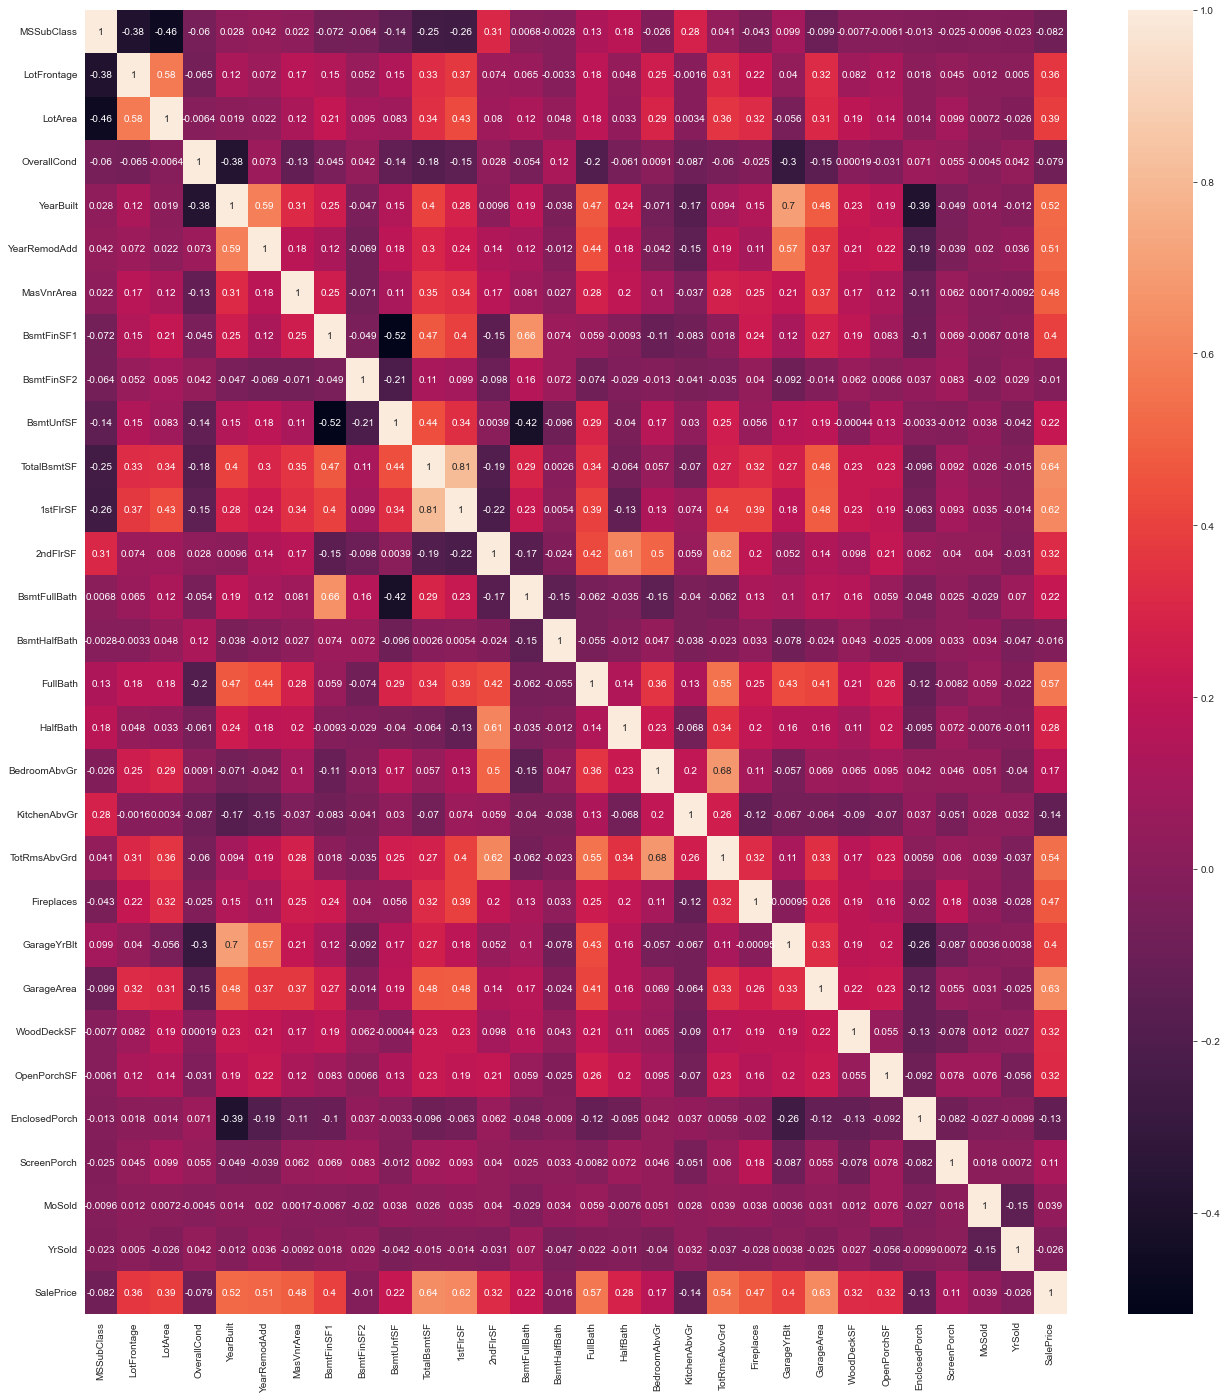

In [104]:
plt.figure(figsize=(22,24))
sns.heatmap(num_data.corr(),annot=True)

In [105]:
cat_data.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [106]:
cat_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [107]:
train.groupby('GarageType')['SalePrice'].count()

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: SalePrice, dtype: int64

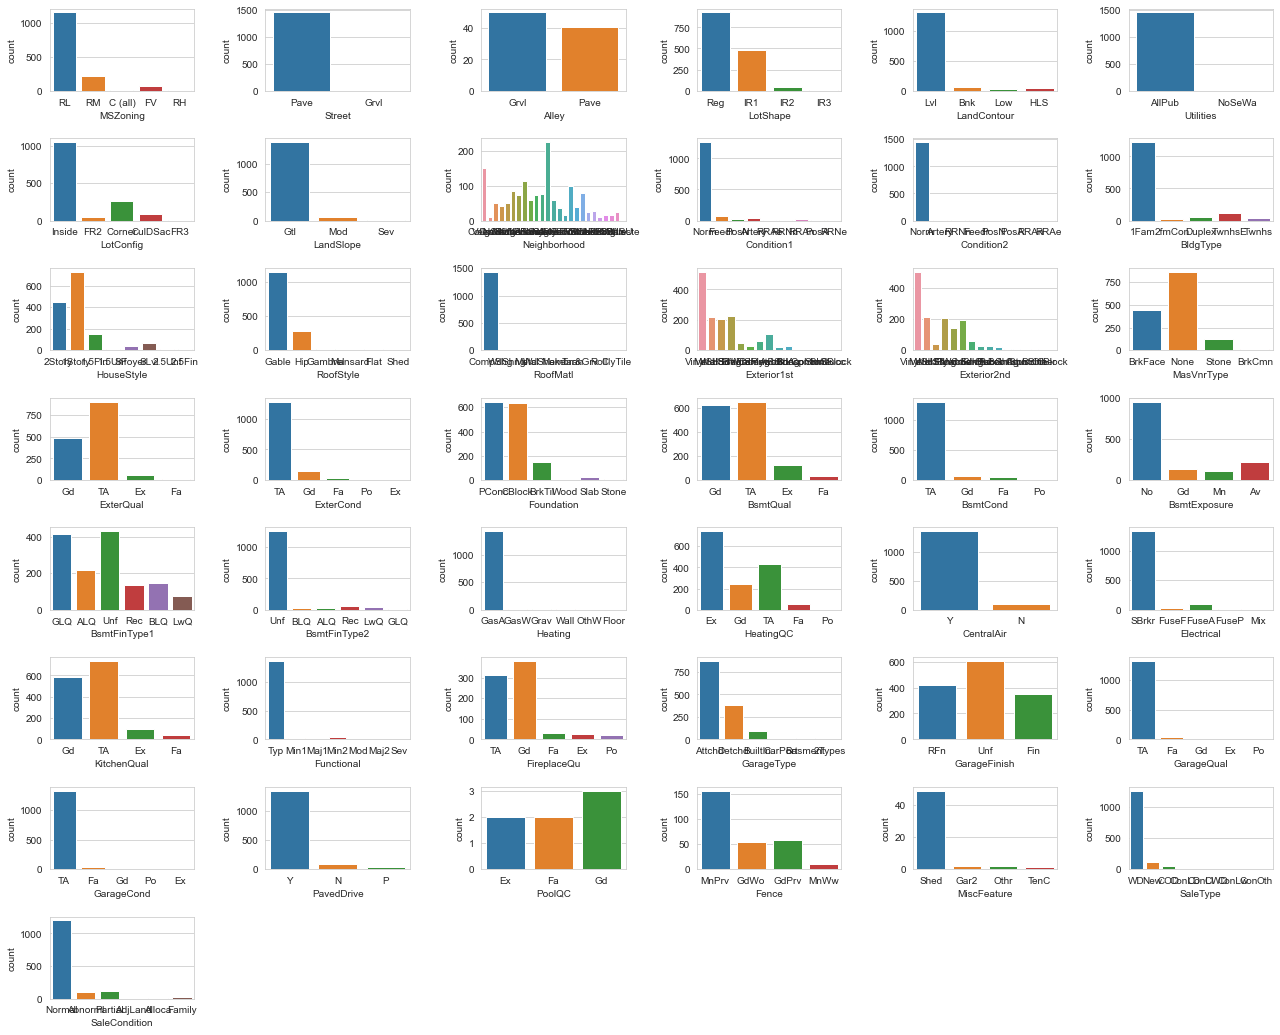

In [108]:
fig = plt.figure(figsize=(18,16))
for ind,col in enumerate(cat_data):
    plt.subplot(9,6,ind+1)
    sns.countplot(x=cat_data.loc[:,col],data=cat_data.dropna())

fig.tight_layout(pad=1.5)

In [109]:
cat_data.drop(['Alley','FireplaceQu','PoolQC','MiscFeature','Fence','Heating','RoofMatl','Condition2','Utilities','Street'],axis=1,inplace=True)

In [110]:
cat_data['MasVnrType'] = cat_data['MasVnrType'].fillna('None')
cat_data['BsmtQual'] = cat_data['BsmtQual'].fillna('TA')
cat_data['BsmtCond'] = cat_data['BsmtCond'].fillna('TA')
cat_data['BsmtExposure'] = cat_data['BsmtExposure'].fillna('No')
cat_data['BsmtFinType1'] = cat_data['BsmtFinType1'].fillna('Unf')
cat_data['BsmtFinType2'] = cat_data['BsmtFinType2'].fillna('Unf')
cat_data['GarageType'] = cat_data['GarageType'].fillna('Attchd')
cat_data['GarageFinish'] = cat_data['GarageFinish'].fillna('unf')
cat_data['GarageQual'] = cat_data['GarageQual'].fillna('TA')
cat_data['GarageCond'] = cat_data['GarageCond'].fillna('TA')
cat_data['Electrical'] = cat_data['Electrical'].fillna('SBrkr')

In [111]:
cat_data.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [112]:
le = LabelEncoder()
for col in cat_data.columns:
    le.fit(cat_data[col].values)
    cat_data[col] = le.transform(cat_data[col].values)

In [113]:
cat_data.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4
1,3,3,3,2,0,24,1,0,2,1,...,4,3,6,1,1,4,4,2,8,4
2,3,0,3,4,0,5,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4
3,3,0,3,0,0,6,2,0,5,1,...,4,2,6,5,2,4,4,2,8,0
4,3,0,3,2,0,15,2,0,5,1,...,4,2,6,1,1,4,4,2,8,4


### TRAIN

In [114]:
train['LotFrontage'] = train['LotFrontage'].fillna(abs(train['LotFrontage'].median()))
train['MasVnrArea'] = train['MasVnrArea'].fillna(abs(train['MasVnrArea'].mean()))
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['LotArea'] = np.log(train.loc[:,'LotArea'])

train.drop(['Id','GrLivArea','OverallQual','LowQualFinSF','GarageCars','PoolArea','3SsnPorch','MiscVal','Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Heating','RoofMatl','Condition2','Utilities'],axis=1,inplace=True)
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['Fireplaces'] > 2.5].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)

train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('TA')
train['BsmtCond'] = train['BsmtCond'].fillna('TA')
train['BsmtExposure'] = train['BsmtExposure'].fillna('No')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')
train['GarageType'] = train['GarageType'].fillna('Attchd')
train['GarageFinish'] = train['GarageFinish'].fillna('Unf')
train['GarageQual'] = train['GarageQual'].fillna('TA')
train['GarageCond'] = train['GarageCond'].fillna('TA')
train['Electrical'] = train['Electrical'].fillna('SBrkr')

In [115]:
colum=train.select_dtypes(include=['object']).columns
colum

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [116]:
columns = []
cat_data = train.select_dtypes(include=['object']).columns
for col in cat_data:
    for col1 in train:
        if col == col1:
            columns.append(col)

### Encoding train

In [117]:
le = LabelEncoder()
for col in train.columns:
    le.fit(train[col].values)
    train[col] = le.transform(train[col].values)

In [118]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,3,3,4,0,5,...,2,0,49,0,0,1,2,8,4,412
1,0,3,51,498,1,3,3,2,0,24,...,2,186,0,0,0,4,1,8,4,339
2,5,3,39,701,1,0,3,4,0,5,...,2,0,30,0,0,8,2,8,4,442
3,6,3,31,489,1,0,3,0,0,6,...,2,0,24,108,0,1,0,8,0,194
4,5,3,55,922,1,0,3,2,0,15,...,2,118,70,0,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,4,0,8,...,2,0,28,0,0,7,1,8,4,314
1456,0,3,56,864,1,3,3,4,0,14,...,2,213,0,0,0,1,4,8,4,415
1457,6,3,37,415,1,3,3,4,0,6,...,2,0,48,0,0,4,4,8,4,527
1458,0,3,39,505,1,3,3,4,0,12,...,2,223,0,38,0,3,4,8,4,199


In [119]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [120]:
submission = pd.DataFrame()
submission['Id'] = test['Id']

In [121]:
test.drop(['Id'], axis = 1, inplace = True)

In [122]:
columns = []
cat_data = test.select_dtypes(include=['object']).columns
for col in cat_data:
    for col1 in test:
        if col == col1:
            columns.append(col)

In [123]:
le = LabelEncoder()
for col in columns:
    le.fit(test[col].values)
    test[col] = le.transform(test[col].values)

In [124]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,2,3,3,0,4,...,0,0,2,4,3,0,6,2006,8,4
1455,160,4,21.0,1894,1,2,3,3,0,4,...,0,0,2,4,3,0,4,2006,8,0
1456,20,3,160.0,20000,1,2,3,3,0,4,...,0,0,2,4,3,0,9,2006,8,0
1457,85,3,62.0,10441,1,2,3,3,0,4,...,0,0,2,2,2,700,7,2006,8,4


In [125]:
t = test.isnull().sum()
t[t >0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [126]:
test.drop(['GrLivArea','OverallQual','LowQualFinSF','PoolArea','3SsnPorch','MiscVal','Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Heating','RoofMatl','Condition2','Utilities'],axis=1,inplace=True)
test['LotArea'] = np.log(test.loc[:,'LotArea'])

test = test.fillna(test['LotFrontage'].mean())
test = test.fillna(test['MasVnrArea'].mean())
test = test.fillna(test['BsmtFinSF1'].mean())
test = test.fillna(test['BsmtFinSF2'].mean())
test = test.fillna(test['BsmtUnfSF'].mean())
test = test.fillna(test['TotalBsmtSF'].mean())
test = test.fillna(test['BsmtFullBath'].mean())
test = test.fillna(test['BsmtHalfBath'].mean())
test = test.fillna(test['GarageCars'].mean())
test = test.fillna(test['GarageYrBlt'].mean())
test = test.fillna(test['GarageArea'].mean())

In [127]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,9.360655,1,3,3,4,0,12,...,4,2,140,0,0,120,6,2010,8,4
1,20,3,81.0,9.565704,1,0,3,0,0,12,...,4,2,393,36,0,0,6,2010,8,4
2,60,3,74.0,9.534595,1,0,3,4,0,8,...,4,2,212,34,0,0,3,2010,8,4
3,60,3,78.0,9.208138,1,0,3,4,0,8,...,4,2,360,36,0,0,6,2010,8,4
4,120,3,43.0,8.518193,1,0,1,4,0,22,...,4,2,0,82,0,144,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,7.568379,1,3,3,4,0,10,...,5,2,0,0,0,0,6,2006,8,4
1455,160,4,21.0,7.546446,1,3,3,4,0,10,...,4,2,0,24,0,0,4,2006,8,0
1456,20,3,160.0,9.903488,1,3,3,4,0,11,...,4,2,474,0,0,0,9,2006,8,0
1457,85,3,62.0,9.253496,1,3,3,4,0,11,...,5,2,80,32,0,0,7,2006,8,4


In [128]:
input = train.drop(['SalePrice'],axis=1)
target = train.SalePrice

In [138]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,3,3,4,0,5,...,2,0,49,0,0,1,2,8,4,412
1,0,3,51,498,1,3,3,2,0,24,...,2,186,0,0,0,4,1,8,4,339
2,5,3,39,701,1,0,3,4,0,5,...,2,0,30,0,0,8,2,8,4,442
3,6,3,31,489,1,0,3,0,0,6,...,2,0,24,108,0,1,0,8,0,194
4,5,3,55,922,1,0,3,2,0,15,...,2,118,70,0,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,3,3,4,0,8,...,2,0,28,0,0,7,1,8,4,314
1456,0,3,56,864,1,3,3,4,0,14,...,2,213,0,0,0,1,4,8,4,415
1457,6,3,37,415,1,3,3,4,0,6,...,2,0,48,0,0,4,4,8,4,527
1458,0,3,39,505,1,3,3,4,0,12,...,2,223,0,38,0,3,4,8,4,199


In [129]:
x_train,x_test,y_train,y_test = train_test_split(input,target,test_size=0.3)

In [130]:
# RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000,max_depth=12,min_samples_split=5,random_state=0)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8728590307519208

In [131]:
y_pred = model.predict(x_test)

In [132]:
mean_squared_error(y_test,y_pred)

3568.5607040974933

In [133]:
pred = model.predict(test)

C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GarageCars
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 64 features, but RandomForestRegressor is expecting 63 features as input.

In [139]:
xg_m = xgb.XGBRegressor(objective='reg:linear',learning_rate=0.1,n_estimators=2000,max_depth=20,alpha=23)
xg_m.fit(x_train,y_train)
xg_m.score(x_test,y_test)

C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:52:39] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


0.8752105692632034

In [140]:
y_pred = xg_m.predict(x_test)
mean_squared_error(y_test,y_pred)

C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


3502.5583134034196

In [142]:
pred = xg_m.predict(test)

ValueError: Feature shape mismatch, expected: 63, got 64

In [145]:
estimator = [('model',model),('xg_m',xg_m)]
lr = RandomForestRegressor(n_estimators=1200,max_depth=8,min_samples_split=2)

In [146]:
mm = StackingRegressor(estimators=estimator,final_estimator=lr)
mm.fit(x_train,y_train)
mm.score(x_test,y_test)

C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:54:02] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:54:58] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:55:00] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:55:02] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:55:04] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:55:06] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.871079769069832

In [147]:
y_pred = mm.predict(x_test)
mean_squared_error(y_test,y_pred)

C:\Users\augus\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


3618.500572879047

In [148]:
pred = mm.predict(test)

C:\Users\augus\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GarageCars
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 64 features, but RandomForestRegressor is expecting 63 features as input.

In [149]:
submission['SalePrice'] = pred
submission.to_csv('my_submission.csv',index=False)

In [150]:
sub = pd.read_csv('./my_submission.csv')
sub

,Id,SalePrice
0,1461,379.333854
1,1462,398.294700
2,1463,452.123588
3,1464,461.296709
4,1465,402.895084
...,...,...
1454,2915,316.249079
1455,2916,340.579558
1456,2917,405.627036
1457,2918,326.755618
